In [1]:
from features.explainability.monkey_patching import patch_shap, patch_lime, patch_sklearn_inspection, patch_alibi, \
    patch_dale, patch_dalex
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Some tensorflow warnings in the pipeline we inspect
from mlinspect.utils import get_project_root

from mlinspect import PipelineInspector

EXAMPLE_PIPELINE = os.path.join(str(get_project_root()), "features", "explainability", "pipeline_with_dag.py")

inspector_result = PipelineInspector\
    .on_pipeline_from_py_file(EXAMPLE_PIPELINE) \
    .add_custom_monkey_patching_module(patch_shap) \
    .add_custom_monkey_patching_module(patch_lime) \
    .add_custom_monkey_patching_module(patch_sklearn_inspection) \
    .add_custom_monkey_patching_module(patch_alibi) \
    .add_custom_monkey_patching_module(patch_dale) \
    .add_custom_monkey_patching_module(patch_dalex) \
    .execute()

extracted_dag = inspector_result.dag
dag_node_to_inspection_results = inspector_result.dag_node_to_inspection_results
check_results = inspector_result.check_to_check_results

Mean accuracy: 0.9452054794520548
Preparation of a new explainer is initiated

  -> data              : numpy.ndarray converted to pandas.DataFrame. Columns are set as string numbers.
  -> data              : 217 rows 9 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 217 values
  -> model_class       : scikeras.wrappers.KerasClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function SklearnKerasClassifierPatching.patched_predict at 0xffff1d635d30> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.429, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         :  'residual_function' returns an Error when executed:
numpy boolean subtract, the `-` operator, 

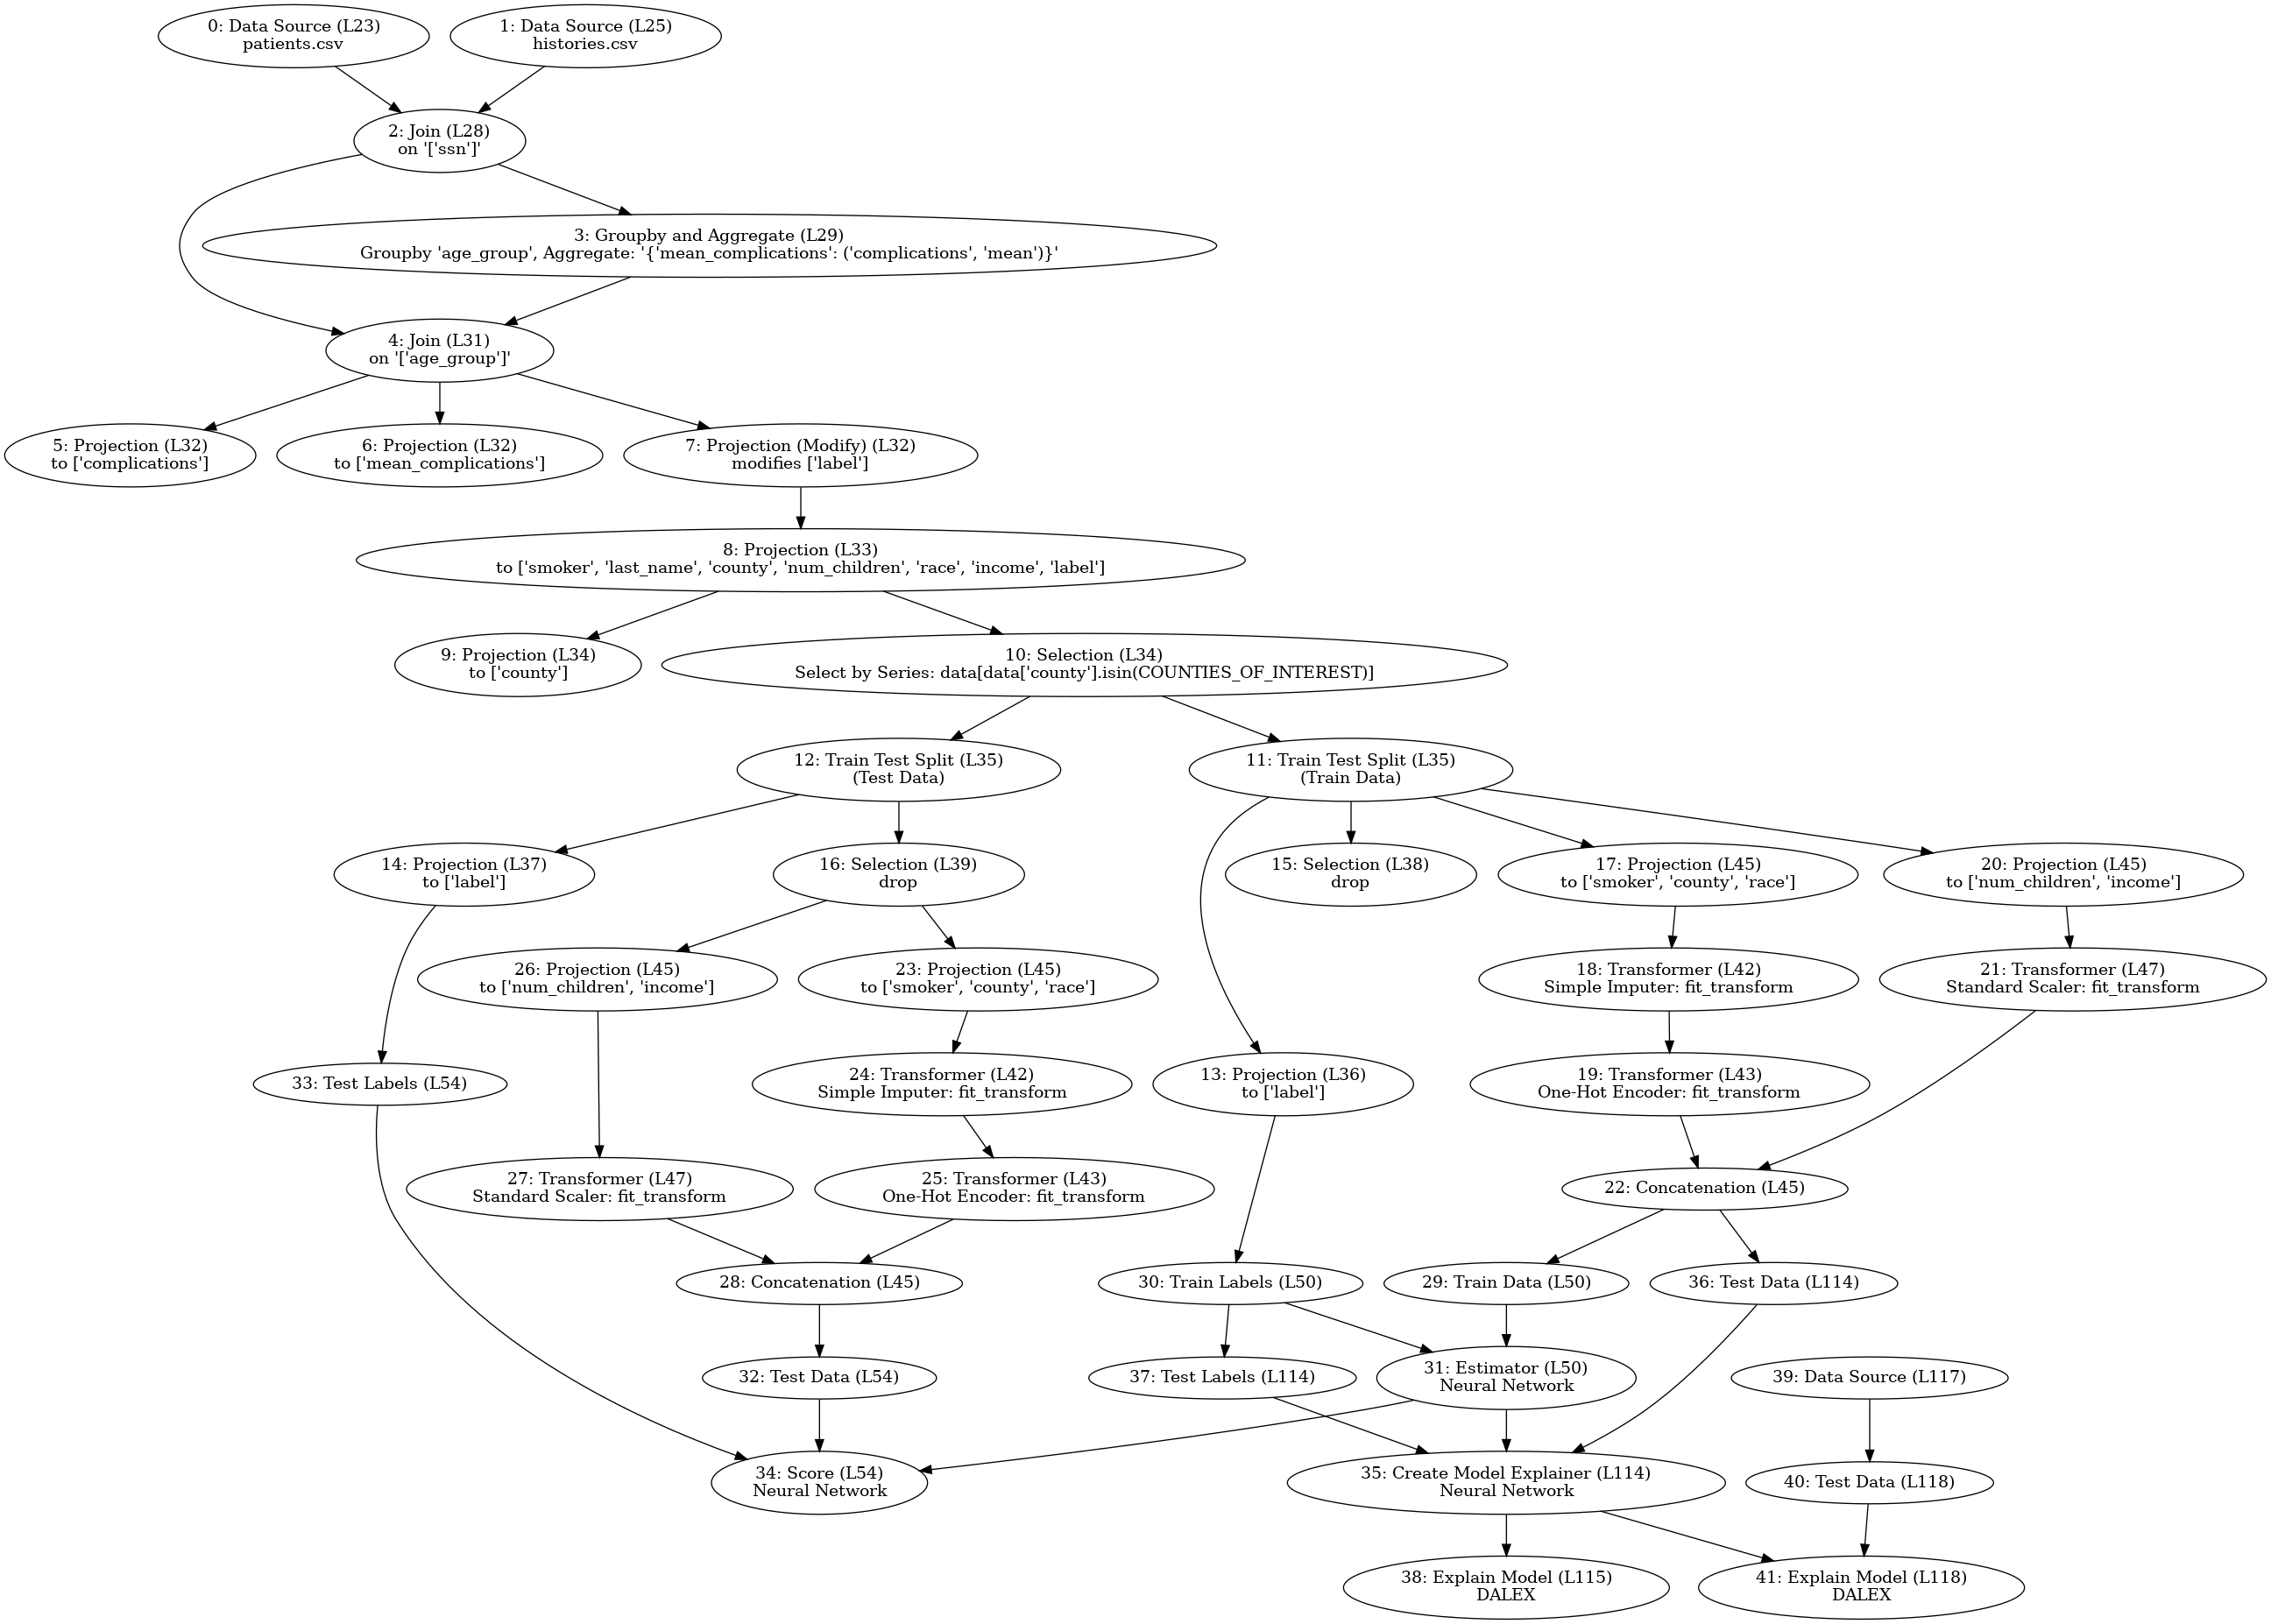

In [2]:
from IPython.display import Image
from mlinspect.visualisation import save_fig_to_path

filename = os.path.join(str(get_project_root()), "features", "explainability", "explainability.png")
save_fig_to_path(extracted_dag, filename)

Image(filename=filename)